In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
def max_vol_lb(A):
    n, r = A.shape

    # The index of row of the submatrix
    row_idx = np.zeros(r)

    # Rest of rows/ unselexted rows
    rest_of_rows = np.array(list(range(n)))

    # Find r rows iteratively
    i = 0
    A_new = A
    while i < r:

        # 남아있는 해의 개수를 나타낸다.
        mask = list(range(A_new.shape[0]))

        rows_norms = np.sum(A_new**2, axis=1)

        # 만약에 남아있는 행이 하나라면 그냥 그것을 반환한다.
        if rows_norms.shape[0] == 1:
            row_idx[i] = rest_of_rows
            break

        # 만약에 벡터의 크기가 0이 된 값이 있다면 삭제한다.
        if any(rows_norms == 0):
            zero_idx = np.argmin(rows_norms, axis=0)
            mask.pop(zero_idx)
            rest_of_rows = rest_of_rows[mask]
            A_new = A_new[mask, :]
            continue 

        # Find the row of max norm
        max_row_idx = np.argmax(rows_norms, axis=0)
        max_row = A[rest_of_rows[max_row_idx], :]

        # compute projection
        projection = np.dot(A_new, max_row.T)
        normalization = np.sqrt(rows_norms[max_row_idx]*rows_norms)
        normalization = normalization.reshape(projection.shape)
        projection = projection / normalization

        # substract the projection from A_new: b <- b - a*projection
        A_new = A_new - A_new * projection.reshape((A_new.shape[0], 1))

        # Delete the selected row
        mask.pop(max_row_idx)
        A_new = A_new[mask, :]

        # update row_idx, row
        row_idx[i] = rest_of_rows[max_row_idx]
        rest_of_rows = rest_of_rows[mask]
        i += 1

    output = A[row_idx.astype(np.int32), :]
    return output

In [3]:
def max_vol_my(A):
    """
    library code
    """
    n, r = A.shape

    # The index of row of the submatrix
    row_idx = np.zeros(r)

    # Rest of rows/ unselexted rows
    rest_of_rows = np.array(list(range(n)))

    # Find r rows iteratively
    i = 0
    A_new = A
    while i < r:

        # 남아있는 해의 개수를 나타낸다.
        mask = list(range(A_new.shape[0]))

        rows_norms = np.sum(A_new**2, axis=1)

        # 만약에 남아있는 행이 하나라면 그냥 그것을 반환한다.
        if rows_norms.shape[0] == 1:
            row_idx[i] = rest_of_rows
            break

        # 만약에 벡터의 크기가 0이 된 값이 있다면 삭제한다.
        if any(rows_norms == 0):
            zero_idx = np.argmin(rows_norms, axis=0)
            mask.pop(zero_idx)
            rest_of_rows = rest_of_rows[mask]
            A_new = A_new[mask, :]
            continue 

        # Find the row of max norm
        max_row_idx = np.argmax(rows_norms, axis=0)
        max_row = A[rest_of_rows[max_row_idx], :]

        # compute projection
        projection = np.dot(A_new, max_row.T)
        normalization = np.sqrt(rows_norms[max_row_idx]*rows_norms)
        normalization = normalization.reshape(projection.shape)
        projection = projection / normalization

        # substract the projection from A_new: b <- b - a*projection
        A_new = A_new - A_new * projection.reshape((A_new.shape[0], 1))

        # Delete the selected row
        mask.pop(max_row_idx)
        A_new = A_new[mask, :]

        # update row_idx, row
        row_idx[i] = rest_of_rows[max_row_idx]
        rest_of_rows = rest_of_rows[mask]
        i += 1

    output = A[row_idx.astype(np.int32), :]
    return output

In [4]:
def max_vol_my(A):
    """
    my code
    """
    n, r = A.shape

    # The index of row of the submatrix
    row_idx = np.zeros(r)

    # Rest of rows/ unselexted rows
    rest_of_rows = np.array(list(range(n)))

    # Find r rows iteratively
    i = 0
    A_new = A
    while i < r:

        # 남아있는 해의 개수를 나타낸다.
        mask = list(range(A_new.shape[0]))

        rows_norms = np.sum(A_new**2, axis=1)

        # 만약에 남아있는 행이 하나라면 그냥 그것을 반환한다.
        if rows_norms.shape[0] == 1:
            row_idx[i] = rest_of_rows
            break

        # 만약에 벡터의 크기가 0이 된 값이 있다면 삭제한다.
        if any(rows_norms == 0):
            zero_idx = np.argmin(rows_norms, axis=0)
            mask.pop(zero_idx)
            rest_of_rows = rest_of_rows[mask]
            A_new = A_new[mask, :]
            continue 
        
        # Here is some difference---------------------------------------------------
        # my code motivated by "gram schmidts process"
        
        # Find the row of max norm
        max_row_idx = np.argmax(rows_norms, axis=0)
        max_row = A_new[max_row_idx, :] # replace A to A_new

        # compute projection
        projection = np.dot(A_new, max_row.T)
        projection = projection/(np.sum(max_row**2))

        # substract the projection from A_new: b <- b - a*projection
        A_new = A_new - np.outer(projection, max_row)
        # --------------------------------------------------------------------------

        # Delete the selected row
        mask.pop(max_row_idx)
        A_new = A_new[mask, :]

        # update row_idx, row
        row_idx[i] = rest_of_rows[max_row_idx]
        rest_of_rows = rest_of_rows[mask]
        i += 1

    output = A[row_idx.astype(np.int32), :]
    return output

In [5]:
def get_maxvol(A):
    """
    Get exact max volume
    """
    
    maxvol = 0
    
    n, r = A.shape
    max_idx = 0
    
    for idx in list(combinations(range(n), r)):
        vol = np.abs(np.linalg.det(A[idx, :]))
        #if vol>= maxvol:
        #    max_idx = idx
        maxvol = np.max([maxvol, vol])
        
    return maxvol #A[max_idx, :]

In [13]:
my_list = []
lb_list = []
rd_list = []
real_list = []

n = 20
r = 10

N_iter = 1000
for i in range(N_iter):
    
    A = np.random.rand(n, r)
    A_sub_my = max_vol_my(A)
    A_sub_lb = max_vol_lb(A) # This means that random choice rows
    A_sub_rd = A[:r, :]
    #real_max_A = get_maxvol(A)
    
    my_list.append(np.abs(np.linalg.det(A_sub_my)))
    lb_list.append(np.abs(np.linalg.det(A_sub_lb)))
    rd_list.append(np.abs(np.linalg.det(A_sub_rd)))
    #real_list.append(np.abs(np.linalg.det(real_max_A)))
    #real_list.append(real_max_A)
    
    
my_list = np.array(my_list)
lb_list = np.array(lb_list)
rd_list = np.array(rd_list)
real_list = np.array(real_list)

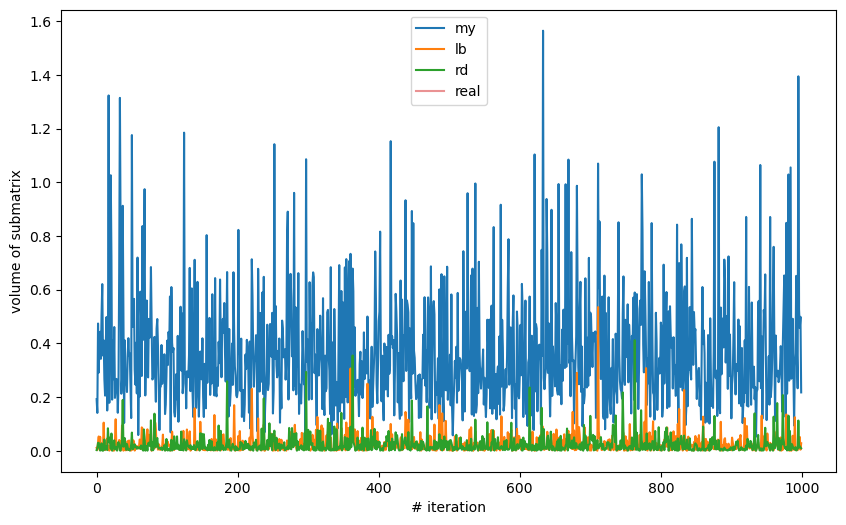

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(my_list, label="my")
plt.plot(lb_list, label="lb")
plt.plot(rd_list, label="rd")
plt.plot(real_list, label="real", alpha=0.5)

plt.xlabel("# iteration")
plt.ylabel("volume of submatrix")
plt.legend()

In [15]:
np.sum(my_list>lb_list)/N_iter

1.0

In [ ]:
np.sum(real_list>my_list)/N_iter

In [ ]:
np.sum(real_list>lb_list)/N_iter

In [ ]:
np.sum(real_list>rd_list)/N_iter